This method is used to predict the price of carbon globally in order to develop a new market for carbon trading and protect the environment.

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [96]:
# Importing Dataset
CarbonPrice = pd.read_csv("/content/CarbonOffset.csv")

# Data Wrangling

In [97]:
# Visualizing top 5 rows from the Dataset
CarbonPrice.head()

,year,buyer_name,buyer_address,buyer_region,buyer_email,emission_rate (mt),buyer_price (usd/mt),seller_name,seller_address,seller_region,...,number_of_trees,avg_tree_age (year),carbon_stored (mt),seller_price (usd/mt),nagotiator_name,nagotiator_address,nagotiator_email,nagotiator_region,ngo,negotiated_price (usd/mt)
0,2021,NaN,NaN,Bangladesh,NaN,30,32.5,NaN,NaN,Bangladesh,...,10,8,10.0,35.5,NaN,NaN,NaN,Bangladesh,NaN,33.0
1,2021,NaN,NaN,China,NaN,45,33.5,NaN,NaN,China,...,15,7,13.5,36.0,NaN,NaN,NaN,China,NaN,35.0
2,2021,NaN,NaN,Canada,NaN,32,33.5,NaN,NaN,Canada,...,11,6,9.0,35.0,NaN,NaN,NaN,Canada,NaN,33.5
3,2021,NaN,NaN,Malaysia,NaN,35,32.5,NaN,NaN,Malaysia,...,8,7,7.5,36.0,NaN,NaN,NaN,Malaysia,NaN,33.0
4,2021,NaN,NaN,India,NaN,35,32.0,NaN,NaN,India,...,5,9,5.0,35.5,NaN,NaN,NaN,India,NaN,33.0


In [98]:
# Dataset size
print(f"The Dataset to be classified has {CarbonPrice.shape[0]} rows and {CarbonPrice.shape[1]} columns.")

The Dataset to be classified has 27 rows and 23 columns.


In [99]:
# Null values
CarbonPrice.isnull().sum()

year                          0
buyer_name                   27
buyer_address                27
buyer_region                  0
buyer_email                  27
emission_rate (mt)            0
buyer_price (usd/mt)          0
seller_name                  27
seller_address               27
seller_region                 0
field_location                0
seller_email                 27
tree_species                  0
number_of_trees               0
avg_tree_age (year)           0
carbon_stored (mt)            0
seller_price (usd/mt)         0
nagotiator_name              27
nagotiator_address           27
nagotiator_email             27
nagotiator_region             0
ngo                          27
negotiated_price (usd/mt)     0
dtype: int64

In [100]:
# Null values identification
CarbonPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       27 non-null     int64  
 1   buyer_name                 0 non-null      float64
 2   buyer_address              0 non-null      float64
 3   buyer_region               27 non-null     object 
 4   buyer_email                0 non-null      float64
 5   emission_rate (mt)         27 non-null     int64  
 6   buyer_price (usd/mt)       27 non-null     float64
 7   seller_name                0 non-null      float64
 8   seller_address             0 non-null      float64
 9   seller_region              27 non-null     object 
 10  field_location             27 non-null     object 
 11  seller_email               0 non-null      float64
 12  tree_species               27 non-null     object 
 13  number_of_trees            27 non-null     int64  
 

In [101]:
# Dataset description
CarbonPrice.describe()

,year,buyer_name,buyer_address,buyer_email,emission_rate (mt),buyer_price (usd/mt),seller_name,seller_address,seller_email,number_of_trees,avg_tree_age (year),carbon_stored (mt),seller_price (usd/mt),nagotiator_name,nagotiator_address,nagotiator_email,ngo,negotiated_price (usd/mt)
count,27.000000,0.0,0.0,0.0,27.000000,27.000000,0.0,0.0,0.0,27.000000,27.000000,27.000000,27.000000,0.0,0.0,0.0,0.0,27.000000
mean,2021.592593,NaN,NaN,NaN,31.740741,32.759259,NaN,NaN,NaN,15.777778,7.222222,15.248519,35.166667,NaN,NaN,NaN,NaN,33.444444
std,0.500712,NaN,NaN,NaN,7.330613,0.641068,NaN,NaN,NaN,8.363535,1.339728,8.514751,0.720577,NaN,NaN,NaN,NaN,0.543021
min,2021.000000,NaN,NaN,NaN,20.000000,31.500000,NaN,NaN,NaN,5.000000,5.000000,4.920000,34.000000,NaN,NaN,NaN,NaN,32.000000
25%,2021.000000,NaN,NaN,NaN,27.500000,32.500000,NaN,NaN,NaN,9.000000,6.000000,8.425000,34.750000,NaN,NaN,NaN,NaN,33.000000
50%,2022.000000,NaN,NaN,NaN,35.000000,33.000000,NaN,NaN,NaN,12.000000,7.000000,11.870000,35.500000,NaN,NaN,NaN,NaN,33.500000
75%,2022.000000,NaN,NaN,NaN,35.000000,33.500000,NaN,NaN,NaN,22.000000,8.000000,22.460000,35.750000,NaN,NaN,NaN,NaN,33.500000
max,2022.000000,NaN,NaN,NaN,45.000000,33.500000,NaN,NaN,NaN,30.000000,11.000000,31.000000,36.000000,NaN,NaN,NaN,NaN,35.000000


In [102]:
# Identify duplication
print(f"Dataset Classify has {CarbonPrice.duplicated().sum()} duplicate values.")

Dataset Classify has 0 duplicate values.


# Exploratory Data Analysis (EDA)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

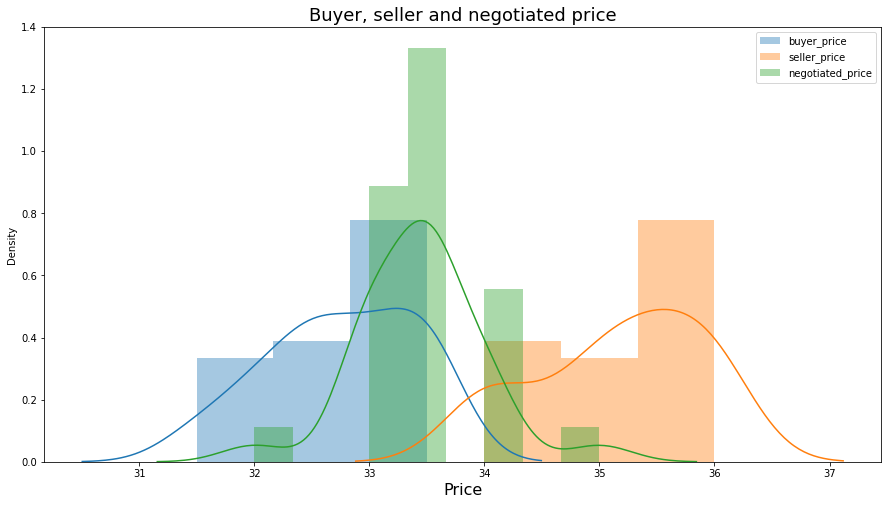

In [103]:
# Buyer, seller and negotiated price
plt.figure(figsize=(15,8))
sns.distplot(CarbonPrice['buyer_price (usd/mt)'], label = 'buyer_price')
sns.distplot(CarbonPrice['seller_price (usd/mt)'], label = 'seller_price')
sns.distplot(CarbonPrice['negotiated_price (usd/mt)'], label = 'negotiated_price')

plt. title('Buyer, seller and negotiated price', fontsize=18)
plt. xlabel('Price', fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


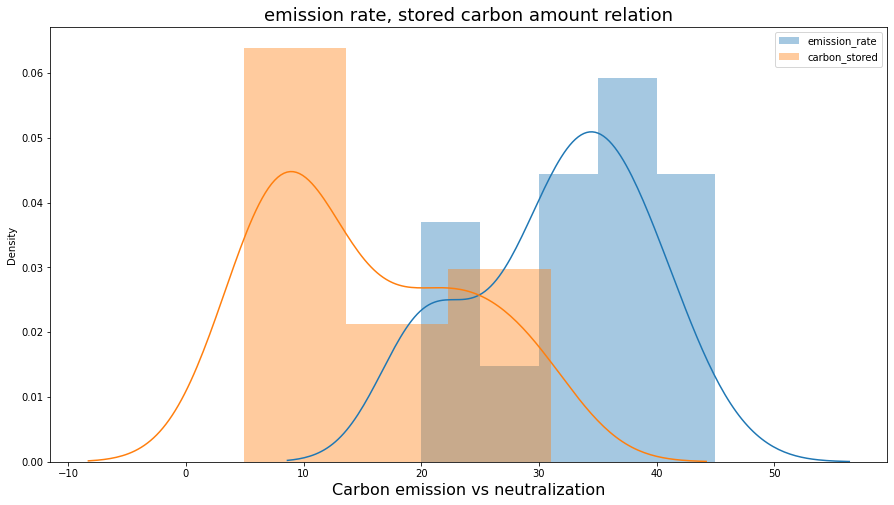

In [104]:
# Emission rate, stored carbon amount
plt.figure(figsize=(15,8))
sns.distplot(CarbonPrice['emission_rate (mt)'], label = 'emission_rate')
sns.distplot(CarbonPrice['carbon_stored (mt)'], label = 'carbon_stored')

plt. title('emission rate, stored carbon amount relation', fontsize=18)
plt. xlabel('Carbon emission vs neutralization', fontsize=16)
plt.legend()
plt.show()

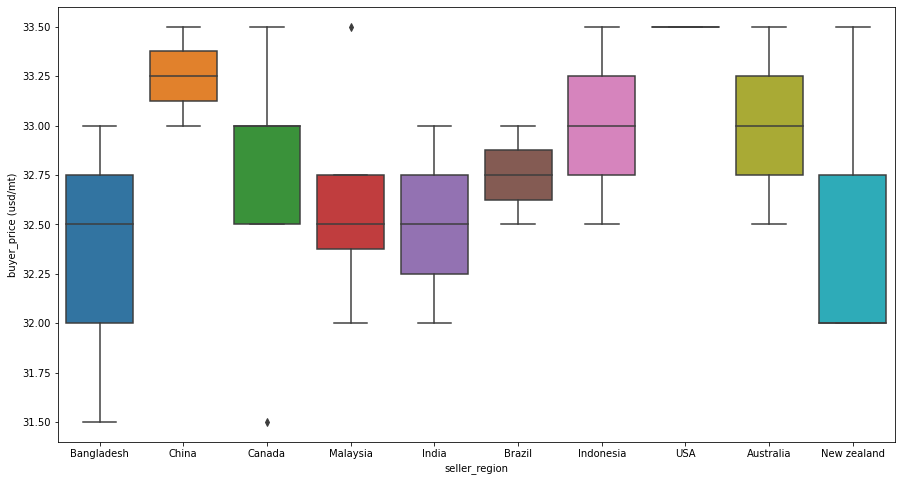

In [159]:
# Buyer price in different region
plt.figure(figsize=(15,8))
sns.boxplot(x="seller_region", y="buyer_price (usd/mt)", data=CarbonPrice)

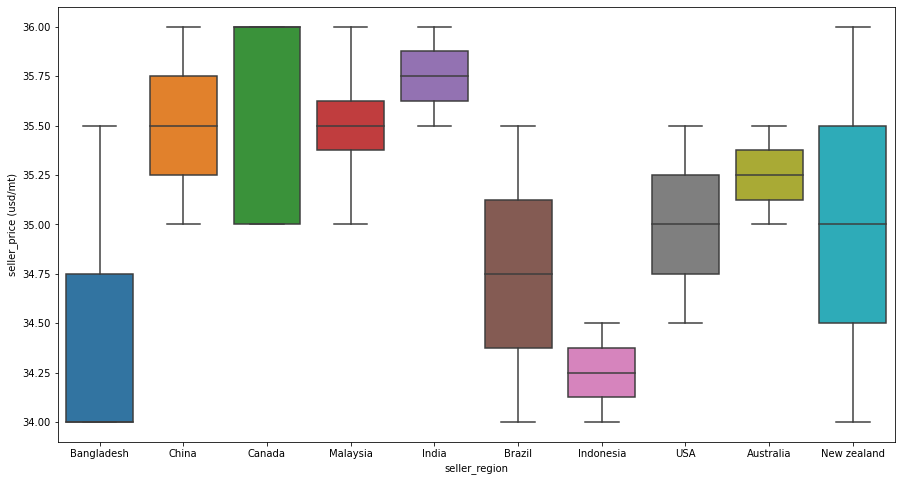

In [160]:
# Seller price in different region
plt.figure(figsize=(15,8))
sns.boxplot(x="seller_region", y="seller_price (usd/mt)", data=CarbonPrice)

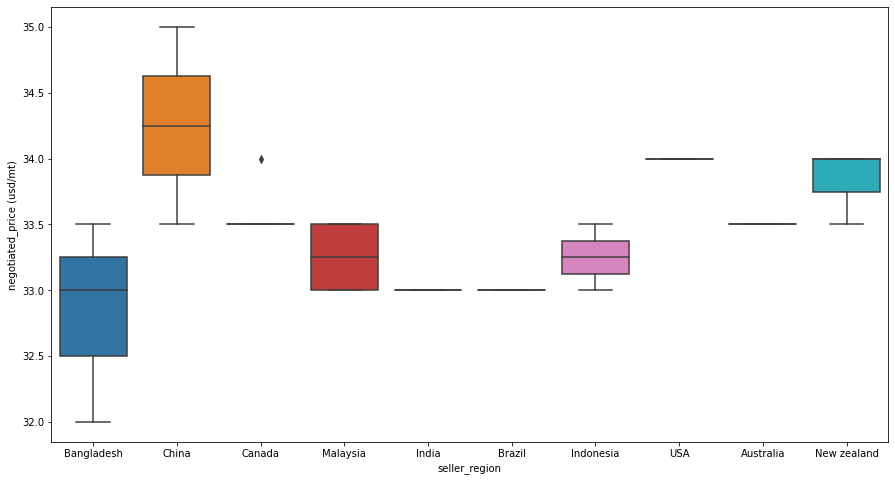

In [164]:
# Negotiated price in different region
plt.figure(figsize=(15,8))
sns.boxplot(x="seller_region", y="negotiated_price (usd/mt)", data=CarbonPrice)

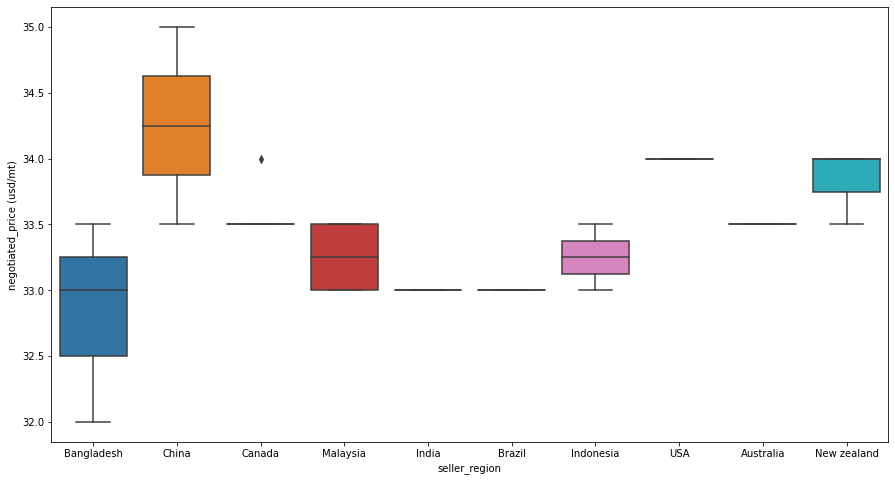

In [166]:
# Negotiated price in different region
plt.figure(figsize=(15,8))
sns.boxplot(x="seller_region", y="negotiated_price (usd/mt)", data=CarbonPrice)

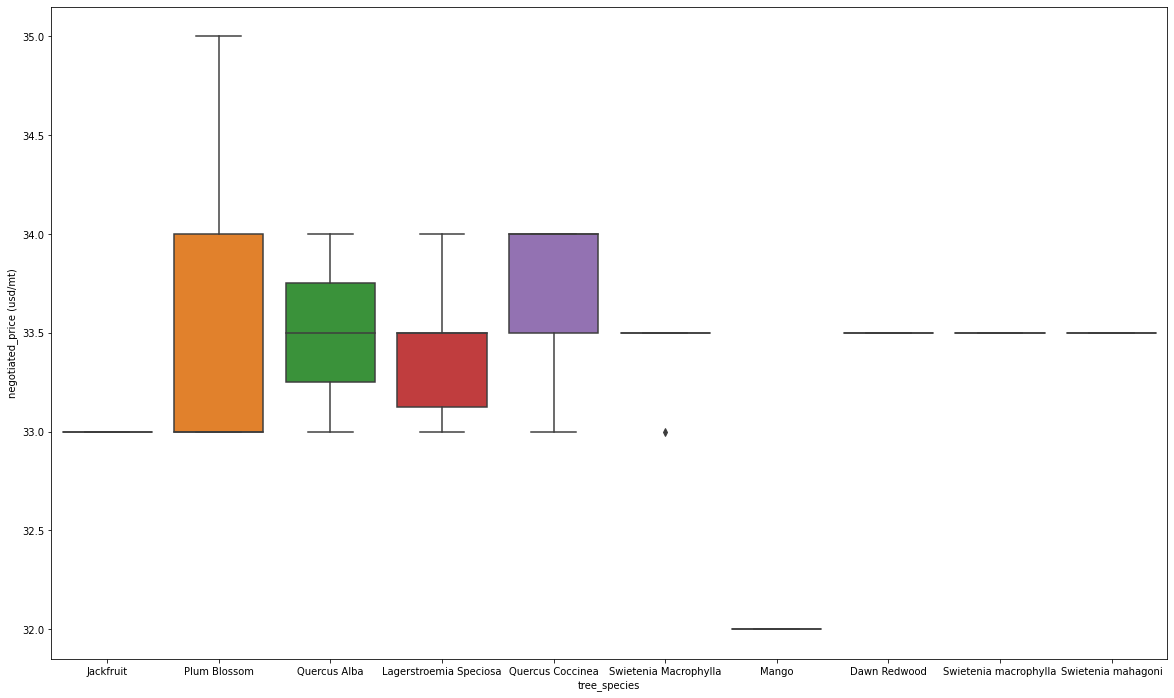

In [168]:
# Negotiated price based on different tree species
plt.figure(figsize=(20,12))
sns.boxplot(x="tree_species", y="negotiated_price (usd/mt)", data=CarbonPrice)

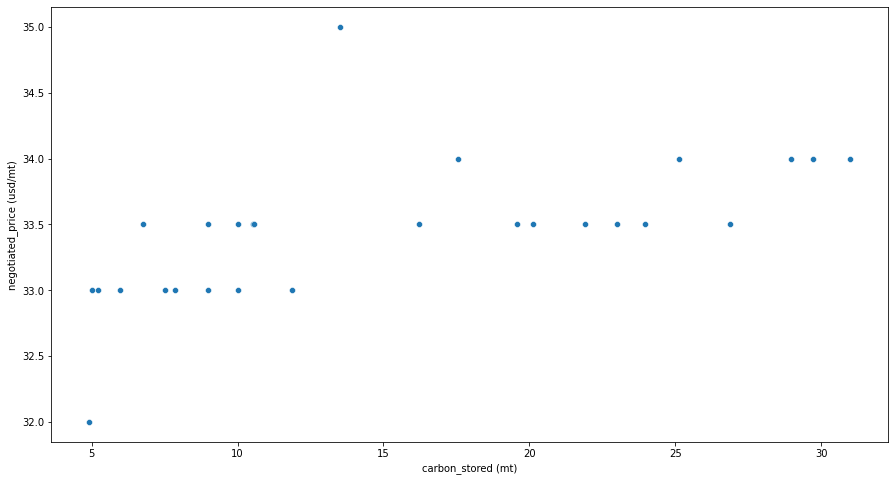

In [108]:
# Negotiated price based on stored carbon
plt.figure(figsize=(15,8))
sns.scatterplot(x="carbon_stored (mt)", y="negotiated_price (usd/mt)", data=CarbonPrice)

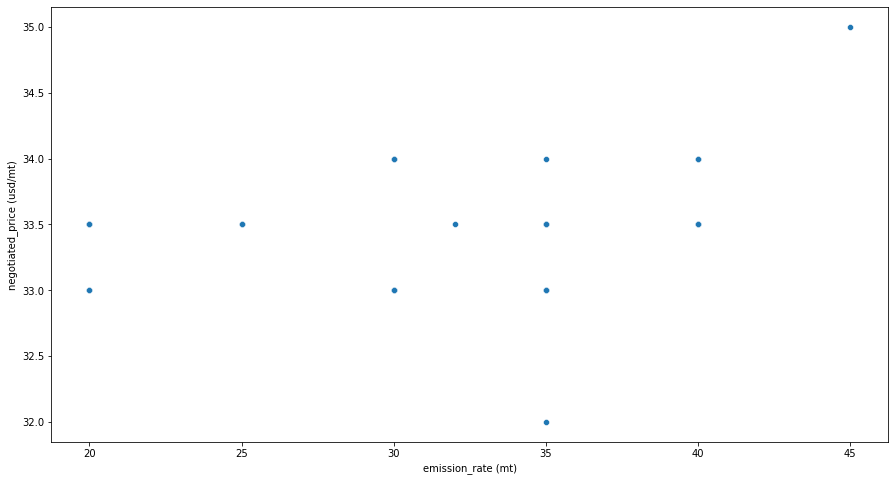

In [109]:
# Negotiated price based on emission rate
plt.figure(figsize=(15,8))
sns.scatterplot(x="emission_rate (mt)", y="negotiated_price (usd/mt)", data=CarbonPrice)

## # Categorical encoding

In [152]:
cat_encd = pd.get_dummies(data = CarbonPrice, columns = ['buyer_region','seller_region','field_location','tree_species'],drop_first=True)
Numerical_dataset  = cat_encd.drop(['year','buyer_name','buyer_address','buyer_email','seller_name','seller_address','seller_email','number_of_trees','avg_tree_age (year)','nagotiator_name','nagotiator_email','nagotiator_address','nagotiator_region','ngo'], axis=1)
Numerical_dataset.head()

,emission_rate (mt),buyer_price (usd/mt),carbon_stored (mt),seller_price (usd/mt),negotiated_price (usd/mt),buyer_region_Bangladesh,buyer_region_Brazil,buyer_region_Canada,buyer_region_China,buyer_region_India,...,field_location_Wellington,tree_species_Jackfruit,tree_species_Lagerstroemia Speciosa,tree_species_Mango,tree_species_Plum Blossom,tree_species_Quercus Alba,tree_species_Quercus Coccinea,tree_species_Swietenia Macrophylla,tree_species_Swietenia macrophylla,tree_species_Swietenia mahagoni
0,30,32.5,10.0,35.5,33.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,45,33.5,13.5,36.0,35.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,32,33.5,9.0,35.0,33.5,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,35,32.5,7.5,36.0,33.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,35,32.0,5.0,35.5,33.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


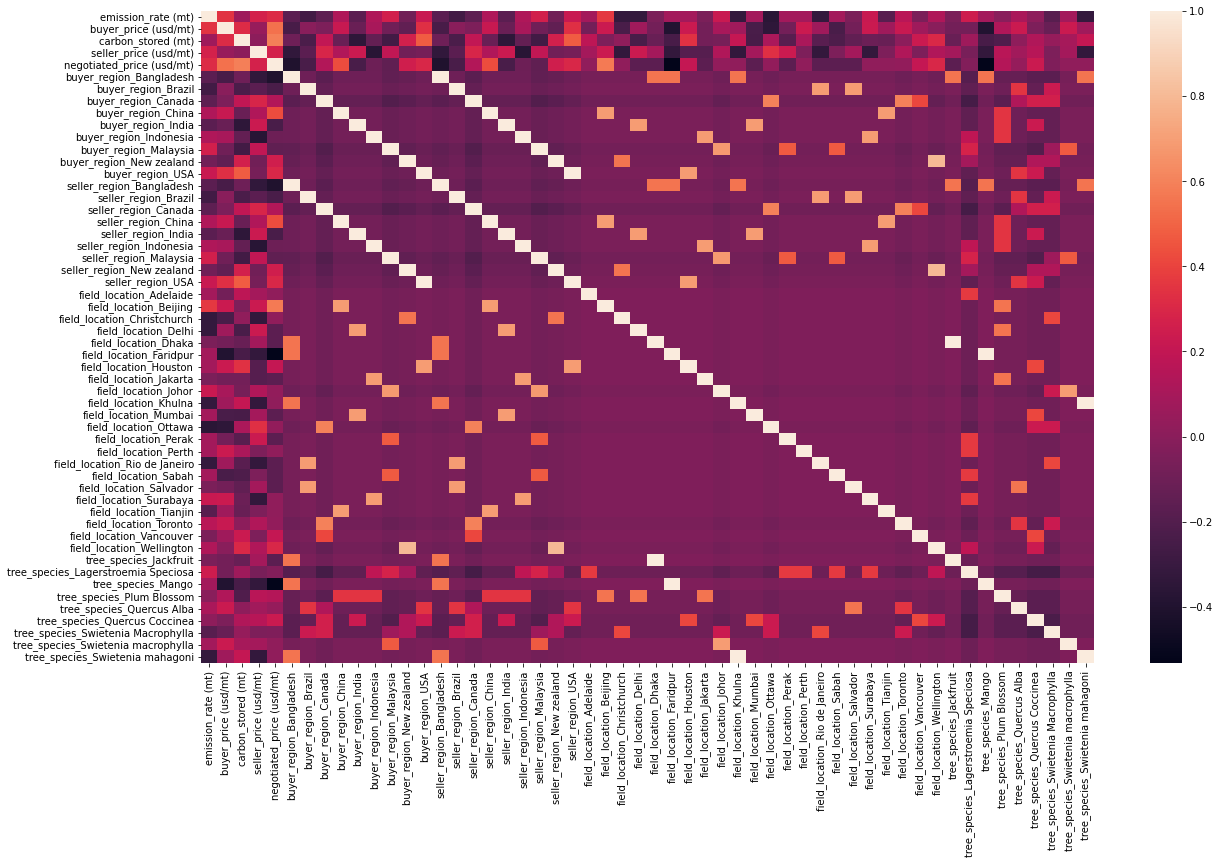

In [155]:
# Correlation Matrix

plt.figure(figsize=(20,12))
sns.heatmap(Numerical_dataset.corr())

# Regression

In [112]:
# input features

f = pd.get_dummies(data = CarbonPrice, columns = ['buyer_region','seller_region','field_location','tree_species'],drop_first=True) # Applying categorical encoding
features = f.drop(['year','buyer_name','buyer_address','buyer_email','seller_name','seller_address','seller_email','number_of_trees','avg_tree_age (year)','nagotiator_name','nagotiator_email','nagotiator_address','nagotiator_region','ngo','negotiated_price (usd/mt)'], axis=1)
features.head()

,emission_rate (mt),buyer_price (usd/mt),carbon_stored (mt),seller_price (usd/mt),buyer_region_Bangladesh,buyer_region_Brazil,buyer_region_Canada,buyer_region_China,buyer_region_India,buyer_region_Indonesia,...,field_location_Wellington,tree_species_Jackfruit,tree_species_Lagerstroemia Speciosa,tree_species_Mango,tree_species_Plum Blossom,tree_species_Quercus Alba,tree_species_Quercus Coccinea,tree_species_Swietenia Macrophylla,tree_species_Swietenia macrophylla,tree_species_Swietenia mahagoni
0,30,32.5,10.0,35.5,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,45,33.5,13.5,36.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,32,33.5,9.0,35.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,35,32.5,7.5,36.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,35,32.0,5.0,35.5,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [113]:
x = features # Collection of features
y = CarbonPrice['negotiated_price (usd/mt)'] # Target or the labels to predict

In [115]:
# Train & Test dataset split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =7)

## Pipeline

In [120]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
mean_squared_error(y_test, y_pred)

0.5010514734296319

In [125]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)
mean_squared_error(y_test, y_pred)

0.42857142857142855

In [126]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
y_pred = RFR.predict(x_test)
mean_squared_error(y_test, y_pred)

0.44594999999999796

In [129]:
# KNeighbors Regressor

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(x_train, y_train)
y_pred = KNR.predict(x_test)
mean_squared_error(y_test, y_pred)

0.4557142857142868

In [140]:
# Support Vector Regressor

from sklearn.svm import SVR
SV = SVR()
SV.fit(x_train, y_train)
y_pred = SV.predict(x_test)
mean_squared_error(y_test, y_pred)

0.4437518325955455

In [137]:
# XGBoost Regressor

from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR.fit(x_train, y_train)
y_pred = XGBR.predict(x_test)
mean_squared_error(y_test, y_pred)

[13:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.4109036487851491

## Evaluating & Comparing Models

In [142]:
# Regressor

names = ["LR", "DTR", "RFR", "KNR", "SV", "XGBR"]

classifiers = [
    LinearRegression(),           
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    SVR(),
    XGBRegressor()]  

In [148]:
from sklearn.metrics import accuracy_score

scores = [] # Load R square score

for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    validation_score = mean_squared_error(y_test, y_pred)
    scores.append(validation_score)

[13:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [149]:
# Load data into data frame

df = pd.DataFrame()
df['name'] = names
df['validation_score'] = scores

In [150]:
# Visualizing R Square score

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,validation_score
0,LR,0.501051
1,DTR,0.428571
2,RFR,0.431486
3,KNR,0.455714
4,SV,0.443752
5,XGBR,0.410904
